# TWITTER ANALYSIS

The code for this analysis can be found on the following url : [Personal Repository](https://github.com/snj-adhikari/tweet-analysis)

The blog that compares and analyse the tweets of obama and donald trump was very useful and was source of influence. 
[Almost Realt time twitter sentiment analysis](https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c)

## Getting Started 

### Setting up tweep and getting user data 

lets keep the authentication and access  key to setup tweepy.

In [0]:
import tweepy
from tweepy import OAuthHandler
import json
import os

import pandas as pd
 


## FILL IN YOUR OWN DETAILS HERE ##

##

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)



Lets get the users tweet now.

In [0]:

user_1_astrophysicist= 'jimmyfallon'
user_2_politics = 'BarackObama'

first_tweet_file = 'jimmyfallon.json'

second_tweet_file = 'barack_obama.json'


user_1 = api.get_user(user_1_astrophysicist)


print("*********** user 1 detail ***************")
print (user_1.screen_name)
print (user_1.name)
print(user_1.description)
print(user_1.location)



user_2 = api.get_user(user_2_politics)

print("*********** user 2 detail ***************")
print (user_2.screen_name)
print (user_2.name)
print(user_2.description)
print(user_2.location)





*********** user 1 detail ***************
jimmyfallon
jimmy fallon
astrophysicist
New York, New York
*********** user 2 detail ***************
BarackObama
Barack Obama
Dad, husband, President, citizen.
Washington, DC


Getting user_1 => Jimmy Fallon (astrophysicis) tweet data and saving into json  

Getting user_2 => Barack Obama (Politician) tweet data and saving into json 

In [0]:

second_user_tweets = api.user_timeline(screen_name = user_2_politics , count = 200 )
first_user_tweets = api.user_timeline(screen_name = user_1_astrophysicist , count = 200 )


print('first_user_tweets len' , len(first_user_tweets));
print('second_user_tweets len' , len(second_user_tweets))
if os.path.exists(first_tweet_file):
    os.remove(first_tweet_file)
if os.path.exists(second_tweet_file):
    os.remove(second_tweet_file)

with open(first_tweet_file, 'w') as outfile:
    for tweet in first_user_tweets:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
#         print(tweet.text)
    print("Successfully created json file from first tweet")
        
with open(second_tweet_file, 'w') as outfile:
    for tweet in second_user_tweets:
        json.dump(tweet._json, outfile, sort_keys=True)
        outfile.write('\n')
#         print(tweet.text)
    print("successfully created json file from second tweet as well")



first_user_tweets len 200
second_user_tweets len 200
Successfully created json file from first tweet
successfully created json file from second tweet as well


### Creating a  Data frame from tweet files


In [0]:

# Reading jimmy fallon tweets
read_in_first_tweets = []
for line in open(first_tweet_file, 'r'):
    read_in_first_tweets.append(json.loads(line))
    
#Reading barack obama tweets 

read_in_second_tweets = []
for line in open(second_tweet_file, 'r'):
    read_in_second_tweets.append(json.loads(line))

    


# Creating dataframe of katy perry 
print("**********************************************")
print("___________ Creating Dataframe of Jimmy Fallon  ______________")
print(" *********************************************")



jimmy_fallon_df =  pd.DataFrame(read_in_first_tweets)

# jimmy_tweet_per = [percent for percent]
# if 'tweet_%_on_hour' in combined_df.columns:
#   combined_df['tweet_%_on_hour'] = jimmy_tweet_per
# else:  
#   combined_df.insert(1, 'tweet_%_on_hour' , jimmy_tweet_per)
  
  

jimmy_fallon_df.head()


# Creating dataframe of barack obama
print("**********************************************")
print("___________ Creating Dataframe of Brack Obama  ______________")
print(" *********************************************")
barack_obama_df = pd.DataFrame(read_in_second_tweets)
barack_obama_df.head()


# Creating dataframe of barack obama
print("**********************************************")
print("___________ Combined Dataframe of tweets  ______________")
print(" *********************************************")


combined_df = pd.concat([jimmy_fallon_df , barack_obama_df] ,sort='False')


print("jimmy fallon tweet df count" , len( jimmy_fallon_df.index))

print("barack obama tweet df count" , len(barack_obama_df.index))

print("the combined tweet count " , len(combined_df.index))




**********************************************
___________ Creating Dataframe of Jimmy Fallon  ______________
 *********************************************
**********************************************
___________ Creating Dataframe of Brack Obama  ______________
 *********************************************
**********************************************
___________ Combined Dataframe of tweets  ______________
 *********************************************
jimmy fallon tweet df count 200
barack obama tweet df count 200
the combined tweet count  400


Lets add extra column information on combined dataframe.

In [0]:
screen_name_list = [user['screen_name'] for user in combined_df['user'].values]
name_list = [user['name'] for user in combined_df['user'].values]
tweet_date = [date for date in combined_df['created_at'].values]

tweets = [tweet for tweet in combined_df['text'].values]

time = [date.split(" ")[3] for date in combined_df['created_at'].values]

hour = pd.to_numeric([item.split(":")[0] for item in time])

hashtags =[entity['hashtags'] for entity in combined_df['entities']]
urls_or_image =['Has pictures / links ' if entity['urls'] or  'media' in entity else 'No picture / link'  for entity in combined_df['entities']]






print(tweet_date[:5])

print(hour[:5])
print(urls_or_image[:5])

print(time[:5])

print(screen_name_list[:5])
print(name_list[:5])

print(name_list[-5:])

# Lets remove text and create new column tweet :) 


combined_df.drop(columns=['text'])


#Lets create new column on dataframe for easy visualization.

if 'person_name' in combined_df.columns:
  combined_df['person_name'] = name_list 
  
else:
  combined_df.insert(0, 'person_name', name_list)
  
if 'screen_name' in combined_df.columns:
  combined_df['screen_name'] = screen_name_list
else:  
  combined_df.insert(1, 'screen_name' , screen_name_list)
  


if 'tweet' in combined_df.columns:
  combined_df['tweet'] = tweets
  
else : 
  combined_df.insert(2 , 'tweet' , tweets)
  
  
if 'time_hour_of_day' in combined_df.columns:
  combined_df['time_hour_of_day'] = hour 
  
else:
  combined_df.insert(3, 'time_hour_of_day' , hour)
  
if 'hash_tags' in combined_df.columns:
  combined_df['hash_tags'] = hashtags
  
else:
  combined_df.insert(4, 'hash_tags' , hashtags)
  
if 'media_info' in combined_df.columns:
  combined_df['media_info'] = urls_or_image 
  
else:
  combined_df.insert(5, 'media_info' , urls_or_image )
  


  






['Thu Oct 24 19:36:29 +0000 2019', 'Thu Oct 24 14:09:09 +0000 2019', 'Thu Oct 24 13:17:24 +0000 2019', 'Wed Oct 23 20:13:29 +0000 2019', 'Wed Oct 23 19:35:21 +0000 2019']
[19 14 13 20 19]
['Has pictures / links ', 'Has pictures / links ', 'Has pictures / links ', 'No picture / link', 'Has pictures / links ']
['19:36:29', '14:09:09', '13:17:24', '20:13:29', '19:35:21']
['jimmyfallon', 'jimmyfallon', 'jimmyfallon', 'jimmyfallon', 'jimmyfallon']
['jimmy fallon', 'jimmy fallon', 'jimmy fallon', 'jimmy fallon', 'jimmy fallon']
['Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama']


Taking only useful column and creating new dataframe from combined dataframe

In [0]:
import numpy as np

refined_df = combined_df[['person_name','screen_name' , 'tweet' , 'time_hour_of_day' , 'hash_tags' , 'media_info']]

refined_df = refined_df.sort_values(['person_name', 'time_hour_of_day'], ascending=[False, True])

# count_df = refined_df.groupby(['screen_name', 'time_hour_of_day']).value_counts()
# total_tweets= refined_df.groupby('screen_name').size().to_frame('total_tweets')

abc= refined_df.groupby(['screen_name', 'time_hour_of_day']).size().to_frame('abc')
refined_df['freq'] = refined_df.groupby(['screen_name','time_hour_of_day'])['screen_name'].transform('count')
refined_df['media_tweet_freq'] = refined_df.groupby(['screen_name','media_info'])['screen_name'].transform('count')
refined_df['total_tweet_by_user'] = refined_df.groupby('screen_name')['screen_name'].transform('count')
# df['freq'] = df.groupby('a')['a'].transform('count')
# abc.type

refined_df['percentage']= (refined_df['freq']/ refined_df['total_tweet_by_user']) * 100


In [0]:
refined_df.head()

,person_name,screen_name,tweet,time_hour_of_day,hash_tags,media_info,freq,media_tweet_freq,total_tweet_by_user,percentage
25,jimmy fallon,jimmyfallon,RT @mommyshorts: Congrats to @jimmyfallon on “...,0,[],No picture / link,6,82,200,3.0
40,jimmy fallon,jimmyfallon,RT @FalpalsChoice: .@jimmyfallon is going to b...,0,"[{'indices': [51, 56], 'text': 'WWHL'}]",No picture / link,6,82,200,3.0
71,jimmy fallon,jimmyfallon,We've got another LIVE show tonight with @just...,0,"[{'indices': [75, 84], 'text': 'ThisIsUs'}]",Has pictures / links,6,118,200,3.0
76,jimmy fallon,jimmyfallon,"LIVE show tonight with @gwenstefani, @BenSPLAT...",0,"[{'indices': [126, 137], 'text': 'FallonLIVE'}]",No picture / link,6,82,200,3.0
77,jimmy fallon,jimmyfallon,RT @zacbrownband: Tonight’s gonna be a fun one...,0,"[{'indices': [107, 114], 'text': 'TheOwl'}]",No picture / link,6,82,200,3.0


In [0]:
refined_df.tail()

,person_name,screen_name,tweet,time_hour_of_day,hash_tags,media_info,freq,media_tweet_freq,total_tweet_by_user,percentage
58,Barack Obama,BarackObama,RT @ObamaFoundation: Courage is contagious. Wa...,22,[],No picture / link,4,25,200,2.0
140,Barack Obama,BarackObama,"Happy Hanukkah! Over these eight nights, we dr...",22,[],Has pictures / links,4,175,200,2.0
65,Barack Obama,BarackObama,RT @ObamaFoundation: Congratulations on the in...,23,[],No picture / link,3,25,200,1.5
84,Barack Obama,BarackObama,"Another good story worth sharing: From one ""ki...",23,[],Has pictures / links,3,175,200,1.5
145,Barack Obama,BarackObama,"When someone shares their story, we see the wo...",23,[],Has pictures / links,3,175,200,1.5


## Analyzing and Visualizing the obtained data

### Posting times of user in 24 hr comparision chart

[Text(0, 0.5, '% ratio of tweet made '), Text(0.5, 0, ' Hour of the day ')]

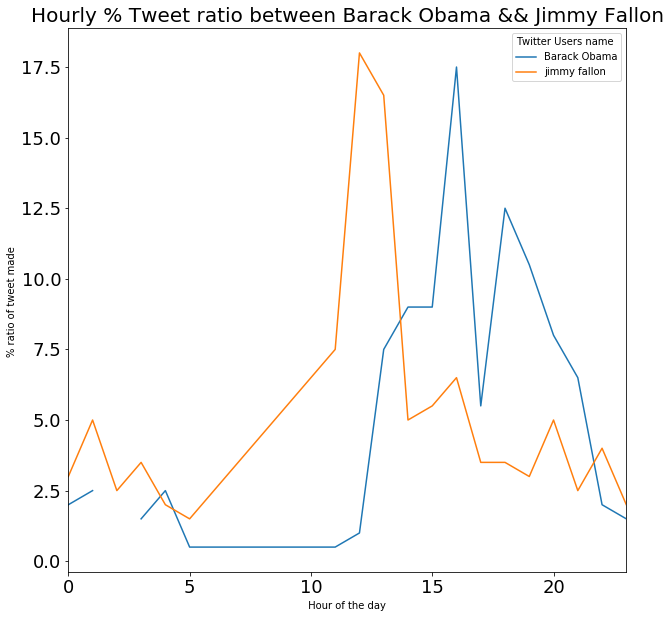

In [0]:
# more_refine_df = refined_df.groupby(['time_hour_of_day']);
visual_df = refined_df.pivot_table(index='time_hour_of_day', columns='person_name', values='percentage')
# visual_df = refined_df.groupby('time_hour_of_day');
# visual_df.plot()
ax = visual_df.plot(title='Hourly % Tweet ratio between Barack Obama && Jimmy Fallon' , figsize=(10,10) ,fontsize = 18 )

ax.title.set_size(20)
ax.legend(title='Twitter Users name ')
ax.set(xlabel=' Hour of the day ', ylabel='% ratio of tweet made ')



### Comparision of tweets with image/url with both user

Text(0, 0.5, 'Proportion of tweets')

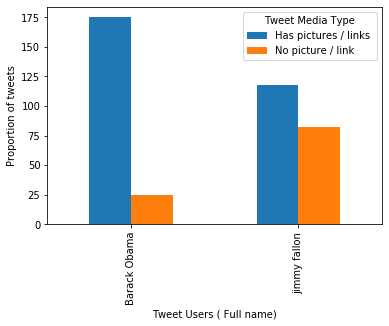

In [0]:
plot = refined_df.groupby(["person_name","media_info"])['media_tweet_freq'].count().unstack().plot(kind='bar' )

plot.set_xlabel("Tweet Users ( Full name)")

plot.legend(title = "Tweet Media Type")

plot.set_ylabel("Proportion of tweets")

### Histogram of Hash Tags use

Histogram plot was built from refering the following tutorial blog post 

The url refered for the code can be found on following url [Create Histogram From Pandas Dataframe](https://wellsr.com/python/python-create-histogram-from-pandas-dataframe/): 



The real help with dataframe split and categorize histogram by person name spliting histogram to two subplot was found in stackoverflow thread [Plotting histograms from grouped data in a pandas DataFrame](https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe)

Text(0.5, 1.12, 'Comparison of Hashtag frequencey used by two user')

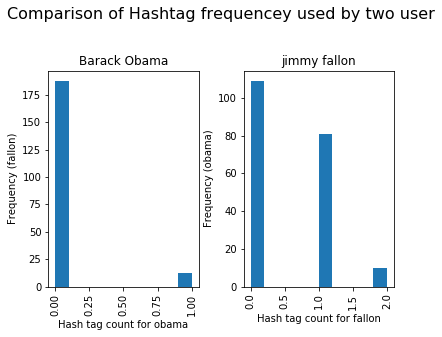

In [0]:

import pylab as plt

hashtag_count = [len(hashs) for hashs in refined_df['hash_tags'].values]

refined_df['hash_count'] = hashtag_count


    
plot = refined_df['hash_count'].hist(by=refined_df['person_name'] )

plot[0].set_xlabel('Hash tag count for obama')
plot[1].set_xlabel('Hash tag count for fallon')


plot[0].set_ylabel('Frequency (fallon)')
plot[1].set_ylabel('Frequency (obama)')


plt.suptitle("Comparison of Hashtag frequencey used by two user" , size=16, y=1.12)



### Log odd ratio

The Log Ratio statistic is an “effect-size” statistic, not a significance statistic: it does represent how big the difference between two corpora are for a particular keyword. It's also a very transparent statistic in that it is easy to understand how it is calculated and why it represents the size of the difference.

Full description can be found in [Log Ratio – an informal introduction](http://cass.lancs.ac.uk/log-ratio-an-informal-introduction/)

#### Lets remove url && most commonly used article from the tweet

In [0]:
import re

import itertools
import collections

def remove_tweet_url(txt):
    """lets remove url or media link present on text file
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [0]:
no_url_tweets_for_jimmy = [remove_tweet_url(tweet) for tweet in jimmy_fallon_df['text'].values]

no_url_tweets_for_barack = [remove_tweet_url(tweet) for tweet in barack_obama_df['text'].values]

# Avoding upper case letter and making all letter to lower case


jimmy_tweet_word_list = [tweet.lower().split() for tweet in no_url_tweets_for_jimmy]


barack_tweet_word_list = [tweet.lower().split() for tweet in no_url_tweets_for_barack]





Installing the nltk packages

In [0]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

filtering the most common used english word such as a , the , an etc. It helps on removing bias and obvious commonly used word.

Referred tutorial from : [Nltk tutorial blog](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

In [0]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from itertools import cycle, islice,chain

stop_words =set(stopwords.words('english'))
filters_word_jimmy = [i for i in itertools.chain(*jimmy_tweet_word_list) if i not in stop_words]
filters_word_barack = [i for i in itertools.chain(*barack_tweet_word_list) if i not in stop_words]

#### Evaluating log odd ratio

First , lets evaluate log odd ratio of all words just filtering url and commonly used article only

More about simultaneous loop in python can be found on [Python | Iterate over multiple lists simultaneously](https://www.geeksforgeeks.org/python-iterate-multiple-lists-simultaneously/)


Log Odd ratio formula can be found in 

[Text analysis of Trump's tweets](http://varianceexplained.org/r/trump-tweets/)

In [0]:
import pandas as pd
obama_log_array =[]
fallon_log_array = []
for (fallon , obama) in zip(filters_word_jimmy,filters_word_barack):
  fallon_log = ((filters_word_jimmy.count(fallon)+1)/(len(filters_word_jimmy) +1))/((filters_word_barack.count(fallon)+1)/(len(filters_word_barack) +1))
  obama_log = ((filters_word_jimmy.count(obama)+1)/(len(filters_word_jimmy) +1))/((filters_word_barack.count(obama)+1)/(len(filters_word_barack) +1)) 
  
  obama_dict = {'name': 'Barack Obama' , 'word' : fallon ,'log_ratio':fallon_log}
  fallon_dict = {'name': 'jimmy fallon' , 'word' : obama ,'log_ratio':obama_log}
  
  obama_log_array.append(obama_dict)
  
  fallon_log_array.append(fallon_dict)
  
  
word_log_obama = pd.DataFrame(obama_log_array)
word_log_fallon = pd.DataFrame(fallon_log_array)


obama_word_unique = word_log_obama.drop_duplicates(subset=['word' ,'log_ratio'], keep=False)

fallon_word_unique = word_log_fallon.drop_duplicates(subset=['word' ,'log_ratio'], keep=False)


print("shape of obama : " , word_log_obama.shape , "shape of fallon : " , word_log_fallon.shape)

print("shape of obama without duplication : " , obama_word_unique.shape , "shape of fallon  without duplication: " , fallon_word_unique.shape)



shape of obama :  (1748, 3) shape of fallon :  (1748, 3)
shape of obama without duplication :  (670, 3) shape of fallon  without duplication:  (746, 3)


In [0]:
obama_word_unique.head()

,name,word,log_ratio
2,Barack Obama,try,2.512293
4,Barack Obama,bts,2.512293
7,Barack Obama,correction,2.512293
8,Barack Obama,army,2.512293
10,Barack Obama,mama,2.512293


In [0]:
fallon_word_unique.head()

,name,word,log_ratio
0,jimmy fallon,samanthajpower,0.628073
1,jimmy fallon,pulitzer,0.628073
2,jimmy fallon,winner,0.628073
4,jimmy fallon,writer,0.628073
7,jimmy fallon,memoir,0.628073


Combining both log odd ratio and plotting graph

In [0]:
import pandas as pd 

combined_df = pd.concat([fallon_word_unique, obama_word_unique])

print("combined dfshape" , combined_df.shape)

combined dfshape (1416, 3)


Taking peek from combined dataframe

In [0]:
print("************** Looking top  data ***********")
print("____________________________________________")
print(combined_df.head())
# combined_df.head()
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("************** Looking buttom  data ***********")
print('_________________________________________________')
print(combined_df.tail())


************** Looking top  data ***********
____________________________________________
           name            word  log_ratio
0  jimmy fallon  samanthajpower   0.628073
1  jimmy fallon        pulitzer   0.628073
2  jimmy fallon          winner   0.628073
4  jimmy fallon          writer   0.628073
7  jimmy fallon          memoir   0.628073
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
************** Looking buttom  data ***********
_________________________________________________
              name            word  log_ratio
1739  Barack Obama          pacman   2.512293
1742  Barack Obama      joelmchale   2.512293
1743  Barack Obama       marcmaron   2.512293
1744  Barack Obama  blakegriffin23   2.512293
1746  Barack Obama       dustyslay   2.512293


#### Visualizing log ratio of 20 words

Here , top 5 and least 5 ratio is taken from both user to get general idea of distribution of log ratio.

Text(0.5, 1.0, 'Log ratio visualization of the word used in tweet')

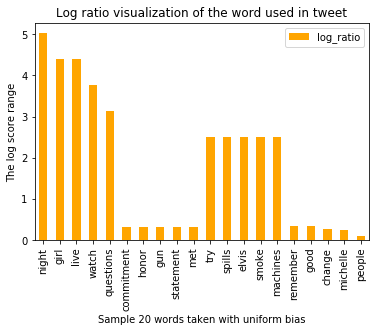

In [0]:
import matplotlib.pyplot as plt
import pandas as pd


fallon_sorted = fallon_word_unique.sort_values(by=['log_ratio'] , ascending=False)
obama_sorted = obama_word_unique.sort_values(by=['log_ratio'] , ascending= False )


top20_df = pd.concat([fallon_sorted.head(5) , fallon_sorted.tail(5) , obama_sorted.head(5) , obama_sorted.tail(5)])

top20_df.shape

top20_df.set_index('word')


# gca stands for 'get current axis'
ax = plt.gca()


plot = top20_df.plot(kind='bar',x='word',color='orange',y=['log_ratio','name'], ax=ax)

plot.set_xlabel("Sample 20 words taken with uniform bias")


plot.set_ylabel("The log score range")

plot.set_title("Log ratio visualization of the word used in tweet")


#### TOP 20 most common used word for jimmy

In [0]:
# all_words_jimmy = list(itertools.chain(*jimmy_tweet_word_list)) 
# Create counter
counts_jimmy = collections.Counter(filters_word_jimmy)

top20_word = counts_jimmy.most_common(20)


top20_word

[('fallontonight', 66),
 ('tonight', 47),
 ('rt', 44),
 ('show', 27),
 ('jimmyfallon', 21),
 ('thank', 20),
 ('fun', 17),
 ('plus', 17),
 ('see', 15),
 ('love', 14),
 ('new', 12),
 ('baby', 12),
 ('music', 12),
 ('amp', 11),
 ('performance', 11),
 ('thanks', 10),
 ('fallonlive', 10),
 ('happy', 9),
 ('im', 9),
 ('hot', 8)]

#### Bar chart of most common used word by jimmy fallon

Extraction of most common used words and bar graph was inspired from the following blog post . [Very simple Python script for extracting most common words from a story](https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0)


How to use custom color on dataframe plot can be found on following stackoverflow thread [Panda Bar graph custom color](https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors)


Text(0.5, 1.0, 'Visualizing the most popular used word')

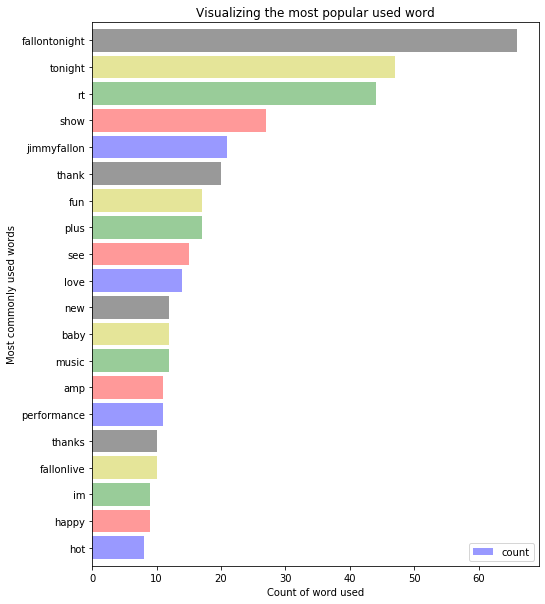

In [0]:

word_df = pd.DataFrame({'name':[val[0] for val in top20_word] ,'count':[val[1] for val in top20_word]})

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(word_df)))

word_df = word_df.sort_values('count', 0)

plot = word_df.plot(x='name',y='count' , alpha = 0.4 , color=my_colors , kind='barh', figsize=(8, 10), zorder=2, width=0.85)
plot.set_ylabel('Most commonly used words')
plot.set_xlabel("Count of word used")
plot.set_title("Visualizing the most popular used word")



#### Word Cloud of Jimmy Fallon

Lets generate the word cloud for proper visualization most commonly used 20 words

Tutorial refered from the blog Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)

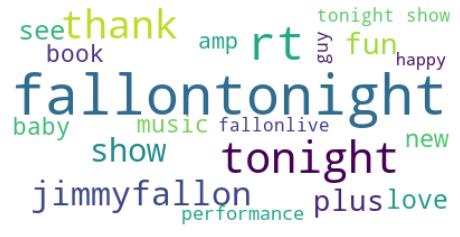

In [0]:
from PIL import Image
from wordcloud import WordCloud , ImageColorGenerator

import matplotlib.pyplot as plt

filtered_text = ' '.join(filters_word_jimmy)

jimmy_wordcloud = WordCloud(max_font_size=80, max_words=20, background_color="white").generate(filtered_text)
plt.figure(figsize=(8,8))
plt.imshow(jimmy_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



#### TOP 20 most common used word for Barack

In [0]:
# Create counter
counts_barack = collections.Counter(filters_word_barack)

top20_word = counts_barack.most_common(20)


top20_word

[('im', 24),
 ('us', 23),
 ('people', 22),
 ('young', 20),
 ('obamafoundation', 19),
 ('rt', 19),
 ('make', 19),
 ('leaders', 17),
 ('day', 17),
 ('today', 16),
 ('happy', 16),
 ('great', 15),
 ('one', 15),
 ('michelleobama', 13),
 ('like', 13),
 ('proud', 12),
 ('years', 12),
 ('always', 11),
 ('new', 11),
 ('world', 11)]

#### Bar chart of top 20 word frequency by obama

Extraction of most common used words and bar graph was inspired from the following blog post . [Very simple Python script for extracting most common words from a story](https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0)


How to use custom color on dataframe plot can be found on following stackoverflow thread [Panda Bar graph custom color](https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors)


Text(0.5, 1.0, 'Visualizing the most popular used word')

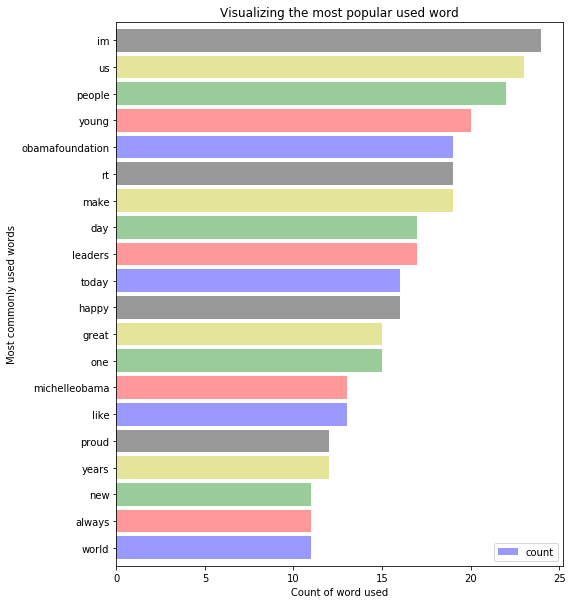

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle, islice


word_df = pd.DataFrame({'name':[val[0] for val in top20_word] ,'count':[val[1] for val in top20_word]})

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(word_df)))

word_df = word_df.sort_values('count', 0)

plot = word_df.plot(x='name',y='count' , alpha = 0.4 , color=my_colors , kind='barh', figsize=(8, 10), zorder=2, width=0.85)
plot.set_ylabel('Most commonly used words')
plot.set_xlabel("Count of word used")
plot.set_title("Visualizing the most popular used word")







#### Word Cloud of Obama 

Lets generate the word cloud for proper visualization most commonly used 20 words

Tutorial refered from the blog Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)

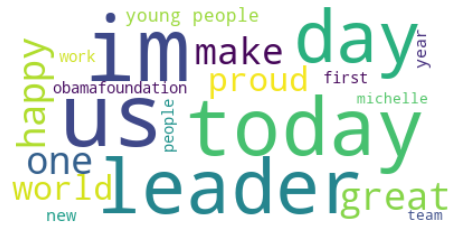

In [0]:
from PIL import Image
from wordcloud import WordCloud , ImageColorGenerator

import matplotlib.pyplot as plt

filtered_text = ' '.join(filters_word_barack)

barack_wordcloud = WordCloud(max_font_size=80, max_words=20, background_color="white").generate(filtered_text)
plt.figure(figsize=(8,8))
plt.imshow(barack_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



### Sentiment Analysis

More about sentiment analysis can be found on the following blog post 
[Simplifying Sentiment Analysis using VADER in Python](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f) and [Twitter Sentiment analysis](https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c)

#### Cleaning the twitter tweets

In [0]:
import numpy as np

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
      input_txt = re.sub(i, '', input_txt)        
  return input_txt
  
  
def clean_tweets(lists):
  # removing  twitter Return handles (RT @xxx:)
  lists = np.vectorize(remove_pattern)(lists, "RT @[\w]*:")
  # remove twitter handles and such  (@xxx)
  lists = np.vectorize(remove_pattern)(lists, "@[\w]*")
  # remove URL links (httpxxx or media link embeeded)
  lists = [remove_tweet_url(text) for text in lists.values]
  # remove special characters, numbers, punctuations (except for #)
  lists = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
  return lists

In [0]:
!pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')


     |████████████████████████████████| 133kB 2.8MB/s 
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_analysis(tweet_lists):
    sentiments_text_array = []
    sent_score_array = []
    comp_score_array = []
    sid = SentimentIntensityAnalyzer()
    for tw in tweet_lists:
        
      score = sid.polarity_scores(tw)

      comp_score = score['compound']

      if comp_score > 0.05 :
        txt ="Positive"
      elif(comp_score > -0.05) and (comp_score < 0.05):
        txt = "Neutral"
      else : 
        txt = "Negative"
      sentiments_text_array.append(txt)
      
      comp_score_array.append(comp_score)

      sent_score_array.append(score)
        
    return sentiments_text_array , sent_score_array , comp_score_array
  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5, 1.0, 'Tweet Sentiment analysis')

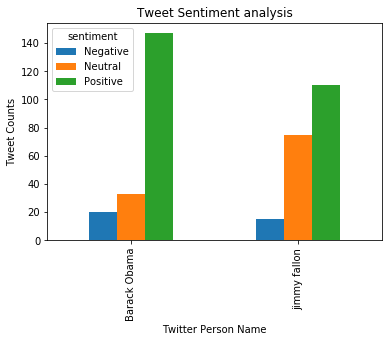

In [0]:
import nltk
nltk.download('vader_lexicon')




sid = SentimentIntensityAnalyzer()


refined_df['clean_tweet'] = refined_df['tweet']


refined_df['sentiment'] , refined_df['sentiment_score'] , refined_df['compound_sentiment'] = sentiment_analysis(refined_df['clean_tweet'].values)


refined_df.head()


plot = refined_df.groupby(["person_name","sentiment"])['person_name'].count().unstack().plot(kind='bar' )

plot.set_xlabel("Twitter Person Name")

plot.set_ylabel("Tweet Counts")

plot.set_title("Tweet Sentiment analysis")

### Calculating average compound tweet of both user.

In [0]:
def cal_score(comp_score):
  
  if comp_score > 0.05 :
    return "Positive"
  elif(comp_score > -0.05) and (comp_score < 0.05):
    return "Neutral"
  else : 
    return "Negative"

In [0]:
barack_df = refined_df[refined_df['screen_name'] == 'BarackObama']

jimmy_df = refined_df[refined_df['screen_name'] == 'jimmyfallon']

total_compound_obama = (barack_df['compound_sentiment'].sum() )/ barack_df.shape[0]
total_compound_fallon = jimmy_df['compound_sentiment'].sum() / jimmy_df.shape[0]

print("the compound score of obama is :: " , total_compound_obama , "The compound score of fallon is" ,  total_compound_fallon)


print("The analysed sentiment of overall tweet of Barack Obama is ::  " , cal_score(total_compound_obama) )

print("The analysed sentiment of overall tweet of Jimmy Fallon is ::  " , cal_score(total_compound_fallon) )





the compound score of obama is ::  0.4027695 The compound score of fallon is 0.28589400000000004
The analysed sentiment of overall tweet of Barack Obama is ::   Positive
The analysed sentiment of overall tweet of Jimmy Fallon is ::   Positive


## Conversion to CSV finally

In [0]:
 refined_df.to_csv( r'/content/Tweet.csv',index=False)